### Аналитика интернет-магазина

В рамках анализа деятельности интернет-магазина необходимо провести приоритизацию выдвинутых гипотез, а также провести A/B тестирование.

Для рассмотрения представлены следующие данные:

1. Информация о 9 гипотезах по увеличению выручки интернет-магазина (hypotesis)
2. Данные о заказах (orders)
3. Данные о посещениях интернет-магазина (visitors)



<a href='#info1'>1. Общая информация</a>

- <a href='#info2'>Вывод</a>

<a href='#info3'>2. Приоритизация гипотез</a>

- <a href='#info4'>Вывод</a>

<a href='#info5'>3. Анализ A/B - тестирования</a>

<a href='#info6'>4. Общий вывод</a>

### 1. Общая информация <a index = info1></a>

Подгрузим необходимые библиотеки и данные в датафреймы.

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('max_colwidth', 400)

1. Рассмотрим таблицу hypothesis:

In [5]:
print(hypothesis.info())
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблицу внесено 9 гипотез с различными оценками характеристик reach (охват), impact (эффект), confidence (уверенность)б efforts (усилия).
Ошибки в данных отсутствуют, однако названиях колонок используются символы разных регистров. Переведём их в нижний регистр. 

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()
print(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


Мы рассмотрели первый из фреймов. Ошибок в данных не обнаружено, названия столбцов приведены к нижнему регистру. Перейдём к рассмотрению следующих таблиц.

2. Orders - информация о заказах

In [7]:
print(orders.info())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


В таблице содержится 1197 значений в 5 столбцах. Пропуски отсутствуют. На первый взгляд мы можем выделить 2 проблемы с данными:

1. Разный регистр в названиях столбцов (transactionId, visitorId)
2. Неправильный формат данных столбца date.

Выборочно переименуем наименования столбцов:

In [8]:
orders.rename(columns = ({'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}), inplace = True)
print(orders.columns)

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


Переведём столбец date в формат datetime:

In [9]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
print(orders.info())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


3. Рассмотрим информацию о посещениях в таблице visitors.

In [10]:
print(visitors.info())
display(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Данные представлены в 62 строках и 3 столбцах - date, group, visitors. Пропусков в данных не обнаружено. Видимые проблемы в данных - неправильный формат столбца date. Переведём его в datetime.

In [11]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')
print(visitors.info())
display(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Вывод <a index=info2></a>

Мы рассмотрели 3 представленных фрейма с данными - hypothesis, orders, visitors. Пропусков в данных не обнаружено. Была произведена следующая предварительная подготовка:

1. Скорректированы названия столбцов в таблицах hypothesis, orders.
2. Изменены на формат datetime столбцы date в таблицах orders и visitors.

Переходим к анализу гипотез.

### 2. Приоритизация гипотез <a index = info3></a>

Рассмотрим, какие гипотезы будут приоритетными для проверки. Воспользуемся методиками ICE и RICE. Добавим расчеты оценок по данным методикам в фрейм hypothesis.

In [12]:
hypothesis['ice_score'] = (hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']).round(2)
hypothesis['rice_score'] = (hypothesis['impact']*hypothesis['confidence']*hypothesis['reach']/hypothesis['efforts']).round(2)
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


In [13]:
print(hypothesis['hypothesis'].unique())

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Запустить акцию, дающую скидку на товар в день рождения']


In [14]:
display(hypothesis[['hypothesis', 'ice_score']].sort_values('ice_score', ascending = False))

,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По методике ICE приоритетной является гипотеза 8, на втором месте - гипотеза с индексом 0, на третьем - гипотеза 7.

Рассмотрим оценку гипотез по методике RICE.

In [15]:
display(hypothesis[['hypothesis', 'rice_score']].sort_values('rice_score', ascending = False))

,hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По методике RICE вперёд вырывается гипотеза 7 за счёт охвата большего количества пользователей (оценка 10), на втором месте - гипотеза 2, на третьем - гипотезы 0 и 6. Гипотеза 8 переместилась на 5 место из-за оцень низкого уровня охвата (1), т.к. пользователи ознакомятся со спецпредложением только в свой день рождения.

Рассмотрим обе оценки на графике:

In [16]:
#labels = hypothesis.index
#x = np.arange(len(labels))
#width = 0.4

#fig = plt.figure(figsize = (10,6))

#задаём столбчатые диаграммы
#bars1 = plt.bar(x-width/2, hypothesis['rice_score'], width, label = 'rice score', alpha = 1)
#bars2 = plt.bar(x+width/2, hypothesis['ice_score'], width, label = 'ice score', alpha = 1)
#plt.ylabel('Score')
#plt.title('Оценки гипотез')
#plt.legend()
#plt.xticks(x)
#plt.show();

In [17]:
scores = hypothesis[['ice_score', 'rice_score']].copy().reset_index()

scores.columns = ['hypothesis', 'ice_score', 'rice_score']
#создаём промежуточную таблицу для построения графика со столбцами - номер гипотезы, тип оценки, оценка.
scores_melted = pd.melt(scores, id_vars='hypothesis',\
                           var_name="score_type", value_name="scores")
#scores_melted

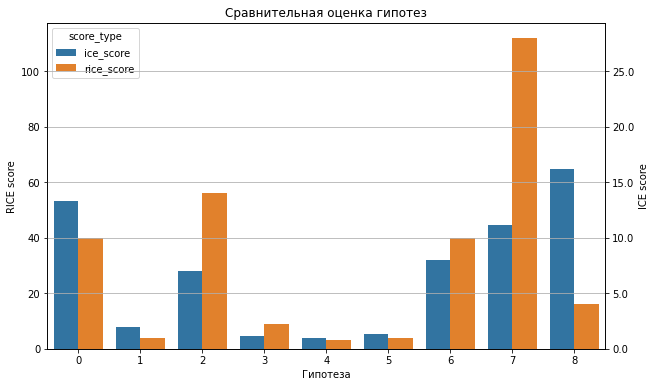

In [18]:
#создаём маску для отбора
mask = scores_melted.score_type.isin(['ice_score'])
#вычисляем величину, на которую будет производиться поправка
scale = int(scores_melted[~mask].scores.mean()
            /scores_melted[mask].scores.mean())
#добавляем поправку
scores_melted.loc[mask, 'scores'] = scores_melted.loc[mask, 'scores']*scale

# Plot

fig, ax1 = plt.subplots(figsize = (10,6))

g = sns.barplot(x='hypothesis', y="scores", hue="score_type",\
                data=scores_melted, ax=ax1)

# Создаём вторую ось y
ax1.set_ylabel('RICE score')
ax2 = ax1.twinx()

# Скалируем отметки на второй оси
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))
ax2.set_ylabel('ICE score')
plt.grid()
plt.title('Сравнительная оценка гипотез')
ax1.set_xlabel('Гипотеза')
plt.show();

На диаграмме мы видим, насколько резким был прирост оценок в отношении гипотезы 7.

### Вывод <a index = info4></a>

Мы провели приоритизацию гипотез. По методике ICE лидируют следующие гипотезы:

- Запустить акцию, дающую скидку на товар в день рождения (8)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)

ПО методике RICE лидируют следующие гипотезы:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)

Гипотеза 8 обладает слишком малым охватом, а гипотеза 2 при большом охвате обладает слабым влиянием на конечный результат. При выборе гипотезы для проведения A/B-теста предлагаем взять 7 (средний ранг между методиками 2) или 0 (средний ранг между методиками 2,5).

### 3. Анализ А/В-теста <a index = info5></a>

Исследуем результаты проведённого A/B-текста. Сначала рассмотрим период, за который были собраны данные.

In [19]:
# выбираем уникальные комбинации дата-группа
dateGroups = orders[['date', 'group']].drop_duplicates()
print(dateGroups['date'].describe())
#print(dateGroups)

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object


Мы видим, что даные собраны за август 2019 года. И значения за каждую дату есть по каждой из групп.

#### 3.1. Оценка результатов по "сырым" данным

Для начала исследуем результаты as is без исключения выбросов.
Соберём агрегированные кумулятивные данные о покупках по дням:

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


count    1197.000000
mean        8.348006
std        39.191132
min         0.050000
25%         1.220000
50%         2.978000
75%         8.290000
max      1294.500000
Name: revenue_thousand, dtype: float64


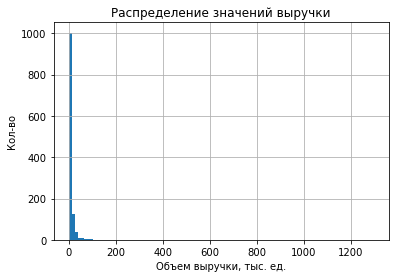

In [21]:
orders['revenue_thousand'] = orders['revenue']/1000
print(orders['revenue_thousand'].describe())
orders['revenue_thousand'].hist(bins = 100)
plt.title('Распределение значений выручки')
plt.xlabel('Объем выручки, тыс. ед.')
plt.ylabel('Кол-во');

In [22]:
#получаем аггрегированные данные о транзакциях по дням
ordersAggr = (dateGroups.apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
              .agg({'date': 'max', 'group': 'max', 'transaction_id': 'nunique', 'revenue': 'sum',\
                    'revenue_thousand': 'sum'}), axis =1)
              .sort_values(by = ['date', 'group'])
             )
ordersAggr.head()

,date,group,transaction_id,revenue,revenue_thousand
55,2019-08-01,A,24,148579,148.579
66,2019-08-01,B,21,101217,101.217
175,2019-08-02,A,44,242401,242.401
173,2019-08-02,B,45,266748,266.748
291,2019-08-03,A,68,354874,354.874


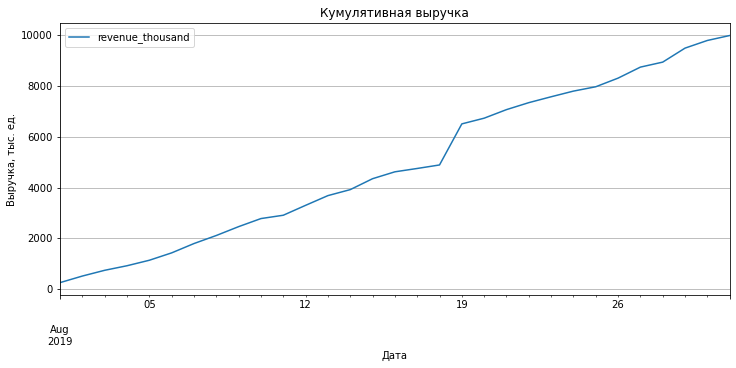

In [23]:
#x = ordersAggr['date'].dt.strftime('%m-%d')
#plt.figure(figsize =(12,5))
result = (ordersAggr
          .pivot_table(values = 'revenue_thousand', index = 'date', aggfunc = 'sum')
          .plot(grid = True, label = 'Выручка', figsize =(12,5)));
#plt.xticks(x)
plt.title('Кумулятивная выручка')
plt.xlabel('Дата')
plt.ylabel('Выручка, тыс. ед.');

Мы видим, что выручка практически равномерно увеличилась по дням с резким скачком между 18 и 19 августа. Похоже, что именно в эту дату был зафиксирован выброс по значениям (1294 тыс. единиц).

Соберём группировку кол-во посетителей по датам:

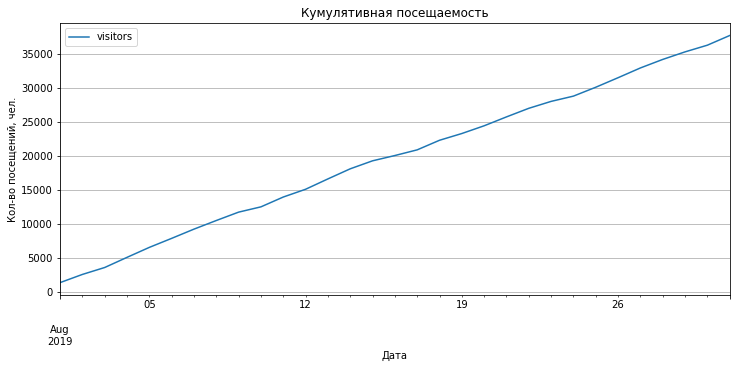

In [24]:
visitorsAggr =  (dateGroups.apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
              .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis =1)
              .sort_values(by = ['date', 'group']))
result2 = (visitorsAggr
           .pivot_table(values = 'visitors', index = 'date', aggfunc = 'sum')
           .plot(grid = True, label = 'Кол-во посетителей', figsize =(12,5)));
plt.title('Кумулятивная посещаемость')
plt.xlabel('Дата')
plt.ylabel('Кол-во посещений, чел.');

Приток посетителей был равномерным без резких скачков. Исследуем данные по группам.

In [25]:
aggrData = ordersAggr.merge(visitorsAggr, left_on = ['date', 'group'], right_on = ['date','group'])
aggrData = aggrData.rename(columns = ({'transaction_id': 'orders'}))
aggrData.head()


,date,group,orders,revenue,revenue_thousand,visitors
0,2019-08-01,A,24,148579,148.579,719
1,2019-08-01,B,21,101217,101.217,713
2,2019-08-02,A,44,242401,242.401,1338
3,2019-08-02,B,45,266748,266.748,1294
4,2019-08-03,A,68,354874,354.874,1845


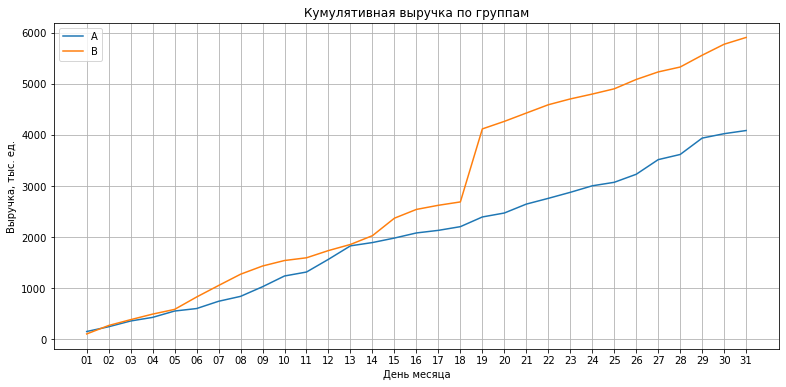

In [26]:
revAggr_A = aggrData[aggrData['group'] == 'A'][['date', 'revenue_thousand']]
revAggr_B = aggrData[aggrData['group'] == 'B'][['date', 'revenue_thousand']]
plt.figure(figsize = (13,6))
plt.plot(revAggr_A['date'].dt.strftime('%d'), revAggr_A['revenue_thousand'], label = 'A')
plt.plot(revAggr_B['date'].dt.strftime('%d'), revAggr_B['revenue_thousand'], label = 'B')
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xlabel('День месяца')
plt.ylabel('Выручка, тыс. ед.')
plt.grid();

Мы видим, что кумулятивная выручка по группе B резко вырывается вперёд. Однако данный эффект, судя по скачку 18.08, возник из-за экстремально крупного заказа. Поэтому для правильной оценки результатов по группам необходимо в дальнейшем исключить выбивающиеся значения.

Рассмотрим разницу в значениях среднего чека по группам.

In [27]:
#делаем расчёт среднего чека
aggrData['avg_order'] = aggrData['revenue']/aggrData['orders']
aggrData['avg_order_round'] = aggrData['revenue_thousand']/aggrData['orders']

In [28]:
# формируем функцию для рисования графиков
def graph_building(frame, check_column, param_name, y_name, check_type): 
    # параметры: название фрейма, исследуемая колонка,\
    #имя параметра, тип оценки (0 - абсолютная, 1 - относительная)
    if check_type == 0:
        Aggr_A = frame[frame['group'] == 'A'][['date', check_column]]
        Aggr_B = frame[frame['group'] == 'B'][['date', check_column]]
        plt.figure(figsize = (13,6))
        plt.plot(Aggr_A['date'].dt.strftime('%d'), Aggr_A[check_column], label = 'A')
        plt.plot(Aggr_B['date'].dt.strftime('%d'), Aggr_B[check_column], label = 'B')
        plt.legend()
        plt.title(param_name)
        plt.xlabel('День месяца')
        plt.ylabel(y_name);
        #добавляем постройку графика для расчета относительных различий
    else:
        Aggr_A = frame[frame['group'] == 'A'][['date', check_column]]
        Aggr_B = frame[frame['group'] == 'B'][['date', check_column]]
        Aggr_AB = Aggr_A.merge(Aggr_B, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])
        a_name = check_column + 'A'
        b_name = check_column + 'B'
        plt.figure(figsize = (13,6))
        plt.plot(Aggr_AB['date'].dt.strftime('%d'),(Aggr_AB[b_name]/Aggr_AB[a_name])-1)
        plt.axhline(y=0, color = 'black', linestyle = '--')
        plt.title('Относительное ' + param_name)
        plt.xlabel('День месяца')
        plt.ylabel('Относительное изменение');

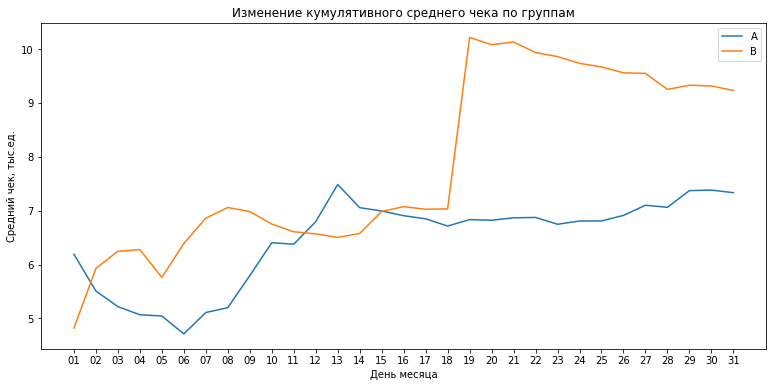

In [29]:
graph_building(aggrData, 'avg_order_round', 'Изменение кумулятивного среднего чека по группам', 'Средний чек, тыс.ед.', 0)

Кумулятивный средний чек группы B резко вырывается вперёд 18 августа из-за аномально крупного заказа. В текущем состоянии рассматриваемых фреймов группа B показывает большую эффективность (но это может оказаться ложным и требует дальнейшего исследования).

Исследуем относительное различие среднего чека:

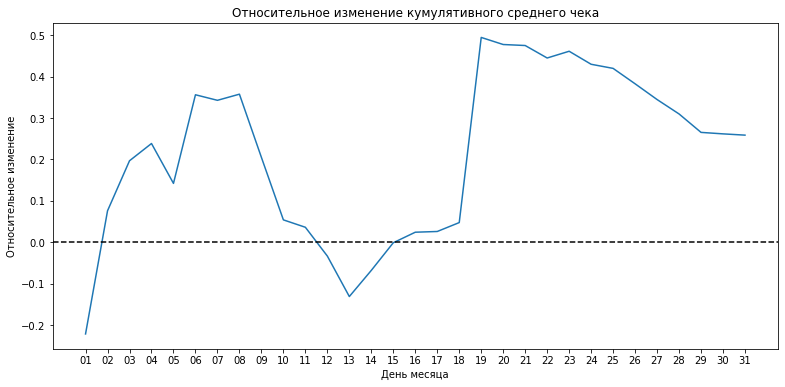

In [30]:
graph_building(aggrData, 'avg_order_round', 'изменение кумулятивного среднего чека','', 1)

Группа B уступает в самом начале, но почти сразу вырывается вперёд и стабилизируется на уровне 0.3. Наличие скачков (например, 13.08 и 18.08) может сигнализировать о выбросах в данных по группам.

Перейдём к рассмотрению такого показателя как **конверсия**.  

In [31]:
aggrData['conversion'] = aggrData['orders']/aggrData['visitors']

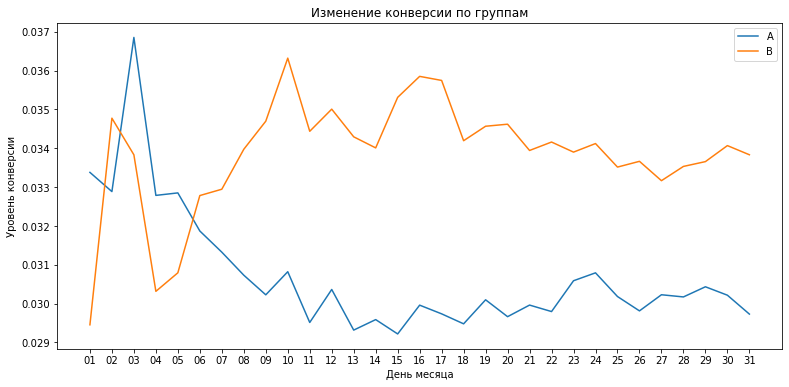

In [32]:
graph_building(aggrData, 'conversion', 'Изменение конверсии по группам', 'Уровень конверсии', 0)

После скачков на начальном этапе мы видим, что различия практически стабилизировались к концу рассматриваемого периода, показав преимущество группы B (различие в 0.005 в конце исследуемого периода).

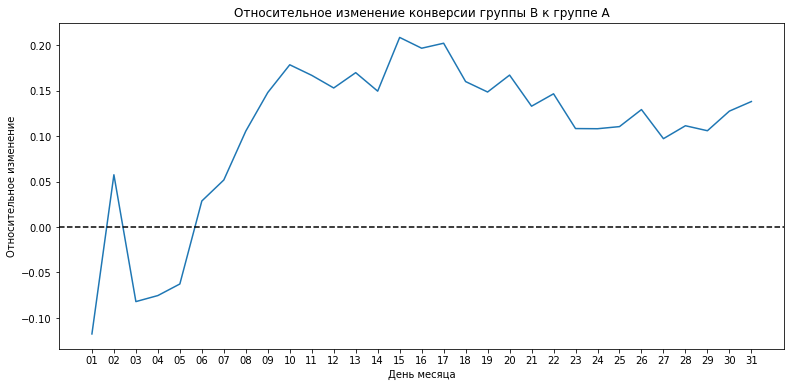

In [33]:
graph_building(aggrData, 'conversion', 'изменение конверсии группы B к группе A', '', 1)

Относительное изменение конверсии подтверждает предыдущий график - итоговый прирост конверсии составил около 15%.

Посчитаем статистическую значимость различия конверсии и среднего чека между группами. Проверку будем осуществлять критерием Манна-Уитни:

In [34]:
#выбираем кол-во заказов от пользователей группы А
orders_users_A = (orders[orders['group'] == 'A']
                  .groupby('visitor_id', as_index = False)
                  .agg({'transaction_id': 'nunique'}))
orders_users_A.columns = ['visitor_id', 'orders']
# выбираем кол-во заказов от пользователей группы B
orders_users_B = (orders[orders['group'] == 'B']
                  .groupby('visitor_id', as_index = False)
                  .agg({'transaction_id': 'nunique'}))
orders_users_B.columns = ['visitor_id', 'orders']

In [35]:
visitors_date_A = visitors[visitors['group'] == 'A']
visitors_date_B = visitors[visitors['group'] == 'B']
visitors_date_A.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [36]:
#формируем series для оценки конверсии
#поставим каждому из пользователей от первого до последнего количество заказов
# для не заказывавших пользователей проставим нули
# т.е. сшиваем комбинацию пользователь-количество заказов с "кол-во пользователей, не заказавших, но зашедших"-0
sampleA = pd.concat([orders_users_A['orders'], pd.Series(0, index = np.arange(visitors_date_A['visitors'].sum()-\
                                                                            len(orders_users_A['orders'])),
                                                       name ='orders')],axis = 0)
sampleB = pd.concat([orders_users_B['orders'], pd.Series(0, index = np.arange(visitors_date_B['visitors'].sum()-\
                                                                            len(orders_users_B['orders'])),
                                                       name ='orders')],axis = 0)
display(sampleA.head())

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Мы создали две переменных, средние в которых будут давать нам суммарную конверсию по группам. Для критерия Манна-Уитни зададим нулевую гипотезу **H0**: конверсии групп A и B не имеют статистически значимых различий. Альтернативная гипотеза **H1** - между конверсиями групп есть статистически значимые различия. Уровень значимости (alpha) установим на уровне **0.05**.

In [37]:
#создаём функцию для проведения статистического теста
def mv_test(groupA, groupB, alpha_value):
    alpha = alpha_value
    results = st.mannwhitneyu(groupA, groupB)
    print('p-value: {:.4f}'.format(results.pvalue))
    if (results.pvalue < alpha):
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Невозможно отвергнуть нулевую гипотезу')

In [38]:
print('Конверсия группы A: {:.3%}'.format(sampleA.mean()))
print('Конверсия группы B: {:.3%}'.format(sampleB.mean()))
print('Отностительная разница конверсий: {:.2%}'.format((sampleB.mean()/sampleA.mean())-1))
mv_test(sampleA, sampleB, 0.05)

Конверсия группы A: 2.973%
Конверсия группы B: 3.383%
Отностительная разница конверсий: 13.81%
p-value: 0.0084
Отвергаем нулевую гипотезу: разница статистически значима


Статистический тест показал, что разница конверсий статистически значима. Т.е. конверсия действительно увеличилась в группе B.
Исследуем разницу среднего чека. Нулевая гипотеза **H0**: нет статистически значимой разницы между средними чеками групп A и B. Альтернативная гипотеза  **H1**: есть значимое различие между средними чеками в группах A и B. Уровень значимости (alpha) установим на уровне **0.05**.

In [39]:
revenueA = orders[orders['group'] == 'A']['revenue']
revenueB = orders[orders['group'] == 'B']['revenue']
print('Отностительная разница средних чеков: {:.2%}'.format((revenueB.mean()/revenueA.mean())-1))
mv_test(revenueA, revenueB, 0.05)

Отностительная разница средних чеков: 25.87%
p-value: 0.3646
Невозможно отвергнуть нулевую гипотезу


Статистический тест показал, что мы не можем отвергнуть нулевую гипотезу. Это значит, что нет статистически значимой разницы между средними чеками данных групп, а относительная разница в 25% объясняется выбросами по величине заказов в группе B.

#### 3.2. Анализ очищенных данных

Теперь оценим результаты тестирования, если очистить данные от выбросов. Оценим, насколько велики выбросы и определим границы, по которым будем отсекать клиентов.

In [40]:
def extremes(frame, col, name): #создаём функцию для постройки гистограммы и диаграммы разброса
    # аргументы - имя фрейма, имя столбца, название величины
    #fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 7))
    plt.hist(frame[col])
    plt.title('Распределение значений показателя ' + name)
    plt.xlabel(name)
    plt.ylabel('Количество совпадений');
    plt.show()
    colormap = np.array(['orange', 'blue'])
    x_values1 = pd.Series(range(0, len(frame[frame['group']=='A'][col])))
    x_values2 = pd.Series(range(0, len(frame[frame['group']=='B'][col])))
    plt.scatter(x_values1, frame[frame['group']=='A'][col], c='orange', alpha=0.5, label = 'A')
    plt.scatter(x_values2, frame[frame['group']=='B'][col], c='blue', alpha = 0.5, label = 'B')
    plt.legend()
    plt.xlabel('Наблюдения')
    plt.ylabel(name)
    plt.title('Разброс значений показателя ' + name);
    print()
    print('95 персентиль по показателю', name, ':{:.0f}'.format(frame[col].quantile(0.95)))
    print('99 персентиль по показателю', name, ':{:.0f}'.format(frame[col].quantile(0.99)))

Проверим выбросы в выручке:

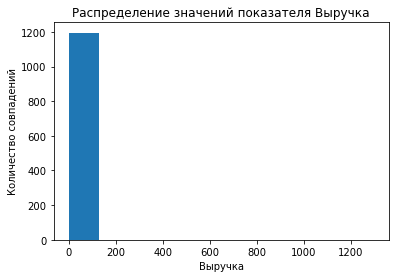


95 персентиль по показателю Выручка :28
99 персентиль по показателю Выручка :58


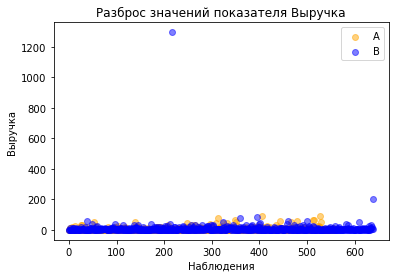

In [41]:
orders['revenue_thousand'] = orders['revenue']/1000
extremes(orders, 'revenue_thousand', 'Выручка')

Мы видим, что в выручке было несколько выбросов, существенно повлиявших на совокупность. Поскольку 99% значений показателя находятся ниже 58 тыс. ед., то считаем возможным установить верхнюю границу в 60 тыс. ед.

Рассмотрим количество заказов на одного клиента:

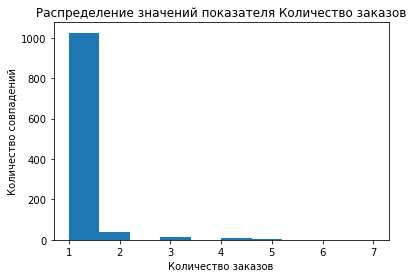


95 персентиль по показателю Количество заказов :2
99 персентиль по показателю Количество заказов :4


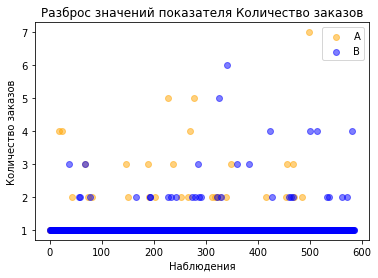

In [42]:
orders_per_user = orders.groupby(['visitor_id', 'group'], as_index = False).agg({'transaction_id':'nunique'})
orders_per_user.columns = ['visitor_id','group', 'order_num']
extremes(orders_per_user, 'order_num', 'Количество заказов')

Среди клиентов есть определённый разброс по количеству заказов. Большинство клиентов не совершало более 4 заказов за период. Однако мы видим на диаграмме, что клиентов с 4 заказами критически мало. В связи с этим предлагаем установить границу количества заказов на уровне **3**.

Подсчитаем число выбивающихся пользователей, исключим их из совокупностей и повторим статистические тесты.

In [43]:
extreme_quant = orders_per_user[orders_per_user['order_num'] > 3]['visitor_id']
extreme_sum = orders[orders['revenue_thousand'] > 60]['visitor_id']
extreme_users = pd.concat([extreme_quant, extreme_sum], axis = 0).drop_duplicates().sort_values()
print(extreme_users.head())
print('Кол-во пользователей с отклонениями',len(extreme_users))

1099    148427295
45      199603092
58      237748145
949     887908475
744     888512513
Name: visitor_id, dtype: int64
Кол-во пользователей с отклонениями 19


Мы получили, что количество пользователей с отклонениями составило 23 человека. Проверим, насколько изменятся оценки статистик. Уровень значимости (alpha) установим на уровне 0.05.

1. Рассчитаем конверсию

In [44]:
sampleA_n = pd.concat([orders_users_A[~orders_users_A['visitor_id'].isin(extreme_users)]['orders']\
                       , pd.Series(0, index = np.arange(visitors_date_A['visitors'].sum()-\
                                                                            len(orders_users_A['orders'])),
                                                       name ='orders')],axis = 0)
sampleB_n = pd.concat([orders_users_B[~orders_users_B['visitor_id'].isin(extreme_users)]['orders']\
                       , pd.Series(0, index = np.arange(visitors_date_B['visitors'].sum()-\
                                                                            len(orders_users_B['orders'])),
                                                       name ='orders')],axis = 0)
print('Конверсия группы A: {:.3%}'.format(sampleA_n.mean()))
print('Конверсия группы B: {:.3%}'.format(sampleB_n.mean()))
print('Отностительная разница конверсий: {:.2%}'.format((sampleB_n.mean()/sampleA_n.mean())-1))
mv_test(sampleA_n, sampleB_n, 0.05)

Конверсия группы A: 2.767%
Конверсия группы B: 3.190%
Отностительная разница конверсий: 15.29%
p-value: 0.0064
Отвергаем нулевую гипотезу: разница статистически значима


Значения схожи с теми, что мы получали ранее (Конверсия группы A: 2.973%
Конверсия группы B: 3.383%). p-value стал даже меньше (с 0.0084 до 0.0062), что подтверждает то, что разница конверсий статистически значима.

2. Исследуем средний чек

In [45]:
revenueA_n = orders[(orders['group'] == 'A')&(~orders['visitor_id'].isin(extreme_users))]['revenue']
revenueB_n = orders[(orders['group'] == 'B')&(~orders['visitor_id'].isin(extreme_users))]['revenue']
print('Отностительная разница средних чеков: {:.2%}'.format((revenueB_n.mean()/revenueA_n.mean())-1))
mv_test(revenueA_n, revenueB_n, 0.05)

Отностительная разница средних чеков: -0.05%
p-value: 0.4604
Невозможно отвергнуть нулевую гипотезу


Мы видим, что с удалением выбросов относительная разница среднего чека практически нивелировалась. p-value выросла с 0.36 до 0.47, что позволяет заключить, что изменения не повлияли на средний чек покупки.

### 4. Общий вывод <a index = info6></a>

В ходе анализа деятельности интернет-магазина были получены следующие результаты.

1) Мы провели приоритизацию гипотез. По методике ICE лидируют следующие гипотезы:

- Запустить акцию, дающую скидку на товар в день рождения (8)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)

ПО методике RICE лидируют следующие гипотезы:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)

Учитывая характеристики гипотез, считаем целесообразным взять для проведения A/B-теста гипотезы 7 (средний ранг между методиками 2) или 0 (средний ранг между методиками 2,5).

2) Анализ A/B тестирования

Анализ показал, что в группе B конверсия увеличилась по сравнению с группой А -

- Конверсия группы A: 2.973% (без выбросов - 2.725%)
- Конверсия группы B: 3.383% (без выбросов - 3.143%)

Прирост составил 13.81% (без выбросов - 15.35%). Изменение конверсии является статистически значимым.

Изменения, применённые к группе B, не повлияли на средний чек.

По результатам тестов группа B показала статистически значимое увеличение конверсии, в связи с чем предлагаем остановить тестирование, признав успешность варианта B с поправкой на то, что изменения не повлияли на размер среднего чека.